# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [22]:
import numpy
from keras.datasets import cifar100
from keras.datasets import cifar10
import numpy as np
np.random.seed(100)
import matplotlib.pyplot as plt
from keras.utils import np_utils

# 資料準備

In [4]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()
print('x_img_train', x_img_train.shape)
print('y_label_train', y_label_train.shape)
print(y_label_train[:10])
print('x_img_test', x_img_test.shape)
print('y_label_test', y_label_test.shape)

x_img_train (50000, 32, 32, 3)
y_label_train (50000, 1)
x_img_test (10000, 32, 32, 3)
y_label_test (10000, 1)


In [12]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()
print('x_img_train', x_img_train.shape)
print('y_label_train', y_label_train.shape)
print(y_label_train[:10])
print('x_img_test', x_img_test.shape)
print('y_label_test', y_label_test.shape)
digit_size = 32
channels = 3

x_img_train (50000, 32, 32, 3)
y_label_train (50000, 1)
x_img_test (10000, 32, 32, 3)
y_label_test (10000, 1)


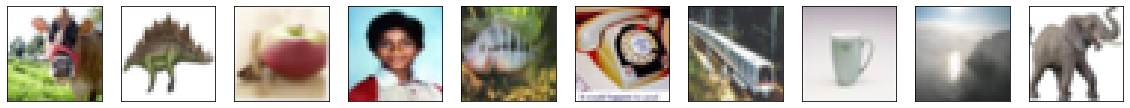

In [13]:
def draw(data):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        if channels > 1:
            plt.imshow(data[i].reshape(digit_size, digit_size, channels), cmap='binary')
        else:
            plt.imshow(data[i].reshape(digit_size, digit_size))
            plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
draw(x_img_train)

# Image normalize 

In [15]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [16]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [19]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [21]:
y_label_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [23]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [24]:
y_label_train_OneHot.shape

(50000, 100)

In [26]:
y_label_train_OneHot[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)